In [29]:
import sys
sys.path.append('..')

import numpy as np
import os
import torch
import train_helpers

from dataset import TARGET_LABEL_NAMES

os.environ['CUDA_VISIBLE_DEVICES'] = "6"
os.environ['CUDA_DEVICE_ORDER'] = "PCI_BUS_ID"

import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
state = torch.load('../log2/checkpoint.best.pth.tar')

In [130]:
state.keys()

dict_keys(['epoch', 'best_loss', 'best_metrics', 'val_metrics_history', 'train_metrics_history', 'model', 'model_state_dict', 'optimizer', 'optimizer_state_dict'])

<Figure size 1080x1080 with 0 Axes>

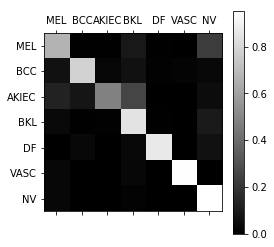

In [131]:
confusion_matrix = state['val_metrics_history'][state['epoch'] - 1]['confusion_matrix']
confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1, keepdims=True)

plt.figure(figsize=(15, 15));
plt.matshow(confusion_matrix, cmap='gray');
plt.xticks(range(len(TARGET_LABEL_NAMES)), TARGET_LABEL_NAMES);
plt.yticks(range(len(TARGET_LABEL_NAMES)), TARGET_LABEL_NAMES);
plt.colorbar();

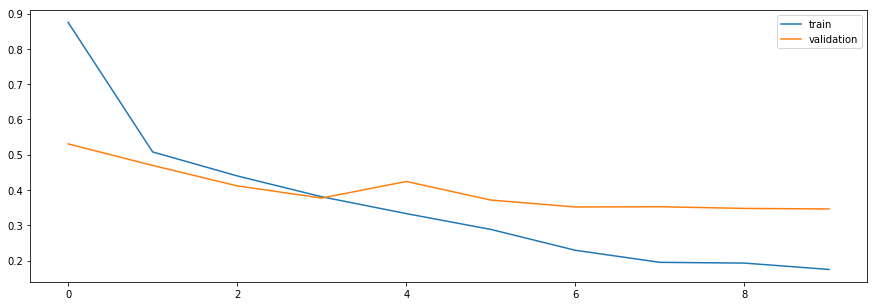

In [132]:
plt.figure(figsize=(15, 5))
plt.plot([metrics['loss'] for metrics in state['train_metrics_history']], label='train')
plt.plot([metrics['loss'] for metrics in state['val_metrics_history']], label='validation')
plt.legend();

In [133]:
cm = state['val_metrics_history'][state['epoch'] - 1]['confusion_matrix']
print(cm)

[[ 145    1    1   20    1    0   49]
 [   8   94    3    8    1    2    4]
 [   8    5   30   16    0    0    3]
 [   8    1    2  188    1    0   22]
 [   0    1    0    1   27    0    2]
 [   1    0    0    1    0   36    0]
 [  36    3    1   19    1    0 1253]]


In [134]:
# Not-weighted accuracy
np.sum(np.diag(cm) / np.sum(cm))

0.8851722416375437

In [135]:
# Weighted accuracy
np.mean(np.diag(cm) / np.sum(cm, axis=1))

0.7935561712153064

In [136]:
# Weighted precision
weights = np.sum(cm, axis=1) / np.sum(cm)
np.sum(np.diag(cm) / np.sum(cm, axis=0) * weights)

0.884975680028923

In [141]:
# Weighted recall (sensitivity)
weights = np.sum(cm, axis=1) / np.sum(cm)
weights /= weights.sum()
np.sum(np.diag(cm) / np.sum(cm, axis=1) * weights)

0.8851722416375437